In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

In [130]:
df = pd.read_csv(r"C:\Users\user\Desktop\creditcard.csv")
df = df.drop("Time", axis=1)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [132]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [133]:
df.head(7)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [134]:
scaler = preprocessing.StandardScaler()
df['std_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop("Amount", axis=1)

<Axes: xlabel='Class', ylabel='count'>

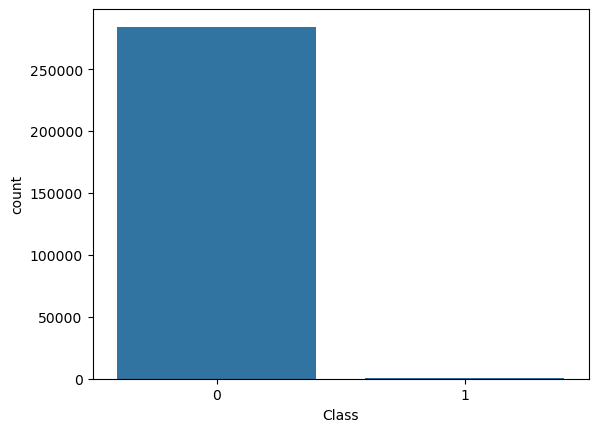

In [135]:
sns.countplot(x="Class", data=df)

In [136]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
cols = df.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"
X = df[cols]
Y = df[target]
X_under, Y_under = undersample.fit_resample(X, Y)
test = pd.DataFrame(Y_under, columns=['Class'])

Text(0.5, 1.0, 'After')

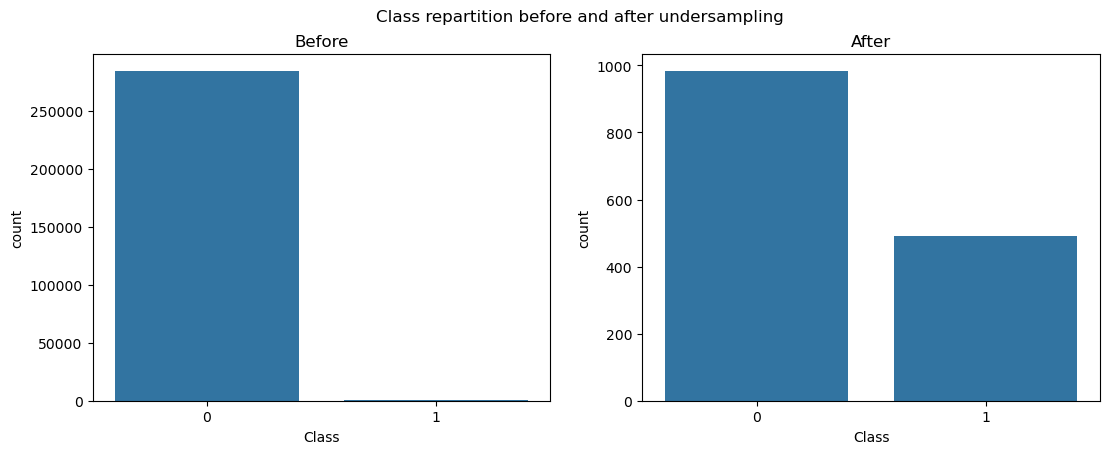

In [137]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])
fig.suptitle("Class repartition before and after undersampling")
a1 = fig.axes[0]
a1.set_title("Before")
a2 = fig.axes[1]
a2.set_title("After")

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)

In [139]:
model1 = LogisticRegression(random_state=2)
logit = model1.fit(X_train, y_train)
y_pred_logit = model1.predict(X_test)
print("Logistic Regression Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_logit))
print("Precision:", metrics.precision_score(y_test, y_pred_logit))
print("Recall:", metrics.recall_score(y_test, y_pred_logit))
print("F1 Score:", metrics.f1_score(y_test, y_pred_logit))

Logistic Regression Metrics:
Accuracy: 0.9425675675675675
Precision: 0.941747572815534
Recall: 0.8981481481481481
F1 Score: 0.919431279620853


In [140]:
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(X_train, y_train)
y_pred_svm = model2.predict(X_test)
print("SVM Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:", metrics.precision_score(y_test, y_pred_svm))
print("Recall:", metrics.recall_score(y_test, y_pred_svm))
print("F1 Score:", metrics.f1_score(y_test, y_pred_svm))

SVM Metrics:
Accuracy: 0.9425675675675675
Precision: 0.9789473684210527
Recall: 0.8611111111111112
F1 Score: 0.916256157635468


In [141]:
model3 = RandomForestClassifier(random_state=2)
rf = model3.fit(X_train, y_train)
y_pred_rf = model3.predict(X_test)
print("Random Forest Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:", metrics.precision_score(y_test, y_pred_rf))
print("Recall:", metrics.recall_score(y_test, y_pred_rf))
print("F1 Score:", metrics.f1_score(y_test, y_pred_rf))

Random Forest Metrics:
Accuracy: 0.9425675675675675
Precision: 0.9504950495049505
Recall: 0.8888888888888888
F1 Score: 0.9186602870813397


In [142]:
# XGBoost
model4 = XGBClassifier(random_state=2)
xgb = model4.fit(X_train, y_train)
y_pred_xgb = model4.predict(X_test)
print("XGBoost Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1 Score:", metrics.f1_score(y_test, y_pred_xgb))

XGBoost Metrics:
Accuracy: 0.9594594594594594
Precision: 0.9705882352941176
Recall: 0.9166666666666666
F1 Score: 0.9428571428571428


In [143]:
from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(random_state=2)
adaboost = model2.fit(X_train, y_train)
y_pred_adaboost = model2.predict(X_test)
print("AdaBoost Classifier Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_adaboost))
print("Precision:", metrics.precision_score(y_test, y_pred_adaboost))
print("Recall:", metrics.recall_score(y_test, y_pred_adaboost))
print("F1 Score:", metrics.f1_score(y_test, y_pred_adaboost))

AdaBoost Classifier Metrics:
Accuracy: 0.9391891891891891
Precision: 0.9411764705882353
Recall: 0.8888888888888888
F1 Score: 0.9142857142857143


In [144]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(random_state=2)
decision_tree = model3.fit(X_train, y_train)
y_pred_decision_tree = model3.predict(X_test)
print("Decision Tree Classifier Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_decision_tree))
print("Precision:", metrics.precision_score(y_test, y_pred_decision_tree))
print("Recall:", metrics.recall_score(y_test, y_pred_decision_tree))
print("F1 Score:", metrics.f1_score(y_test, y_pred_decision_tree))

Decision Tree Classifier Metrics:
Accuracy: 0.9290540540540541
Precision: 0.9223300970873787
Recall: 0.8796296296296297
F1 Score: 0.9004739336492891


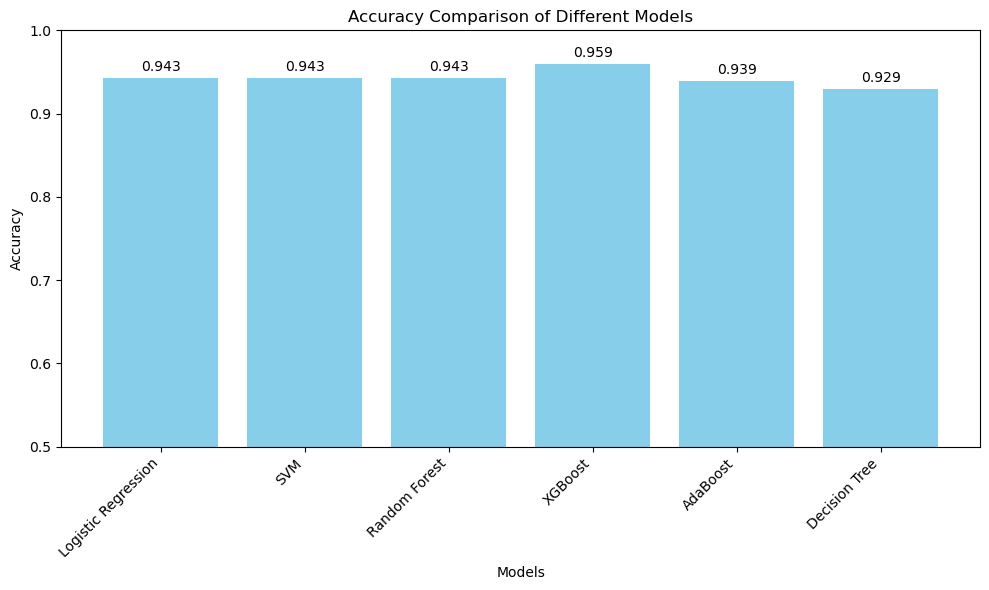

In [145]:
# Extracting accuracy values
accuracy_values = [
    metrics.accuracy_score(y_test, y_pred_logit),
    metrics.accuracy_score(y_test, y_pred_svm),
    metrics.accuracy_score(y_test, y_pred_rf),
    metrics.accuracy_score(y_test, y_pred_xgb),
    metrics.accuracy_score(y_test, y_pred_adaboost),
    metrics.accuracy_score(y_test, y_pred_decision_tree)
]

# Model names
model_names = ["Logistic Regression", "SVM", "Random Forest", "XGBoost", "AdaBoost", "Decision Tree"]

# Creating a bar plot with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_values, color='skyblue')

# Adding accuracy values as annotations
for bar, acc in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{acc:.3f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.5, 1.0)  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()

In [146]:
from sklearn.model_selection import GridSearchCV

logistic_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search_logistic = GridSearchCV(LogisticRegression(), logistic_params, cv=5)
grid_search_logistic.fit(X_train, y_train)

best_logistic_model = grid_search_logistic.best_estimator_

In [147]:
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001]
}

grid_search_svm = GridSearchCV(SVC(probability=True), svm_params, cv=5)
grid_search_svm.fit(X_train, y_train)

best_svm_model = grid_search_svm.best_estimator_

In [148]:
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_

In [149]:
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10]
}

grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), xgb_params, cv=5)
grid_search_xgb.fit(X_train, y_train)

best_xgb_model = grid_search_xgb.best_estimator_

In [150]:
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
}

grid_search_ada = GridSearchCV(AdaBoostClassifier(), ada_params, cv=5)
grid_search_ada.fit(X_train, y_train)

best_ada_model = grid_search_ada.best_estimator_

In [151]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_

In [152]:
y_pred_best_logit = best_logistic_model.predict(X_test)
print("Best Logistic Regression Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_best_logit))
print("Precision:", metrics.precision_score(y_test, y_pred_best_logit))
print("Recall:", metrics.recall_score(y_test, y_pred_best_logit))
print("F1 Score:", metrics.f1_score(y_test, y_pred_best_logit))

Best Logistic Regression Metrics:
Accuracy: 0.9425675675675675
Precision: 0.9504950495049505
Recall: 0.8888888888888888
F1 Score: 0.9186602870813397


In [153]:
best_models = [best_logistic_model, best_svm_model, best_rf_model, best_xgb_model, best_ada_model, best_dt_model]
algorithm_names = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 'AdaBoost', 'Decision Tree']

rank_data = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'AUC': []
}

for i, model in enumerate(best_models):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[::, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    rank_data['Algorithm'].append(algorithm_names[i])
    rank_data['Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    rank_data['Precision'].append(metrics.precision_score(y_test, y_pred))
    rank_data['Recall'].append(metrics.recall_score(y_test, y_pred))
    rank_data['F1 Score'].append(metrics.f1_score(y_test, y_pred))
    rank_data['AUC'].append(auc)

rank_df = pd.DataFrame(rank_data)
rank_df['Rank'] = rank_df['AUC'].rank(ascending=False)
rank_df = rank_df.sort_values('Rank')

# Displaying the rank comparison
print(rank_df)

             Algorithm  Accuracy  Precision    Recall  F1 Score       AUC  \
1                  SVM  0.945946   0.950980  0.898148  0.923810  0.979659   
3              XGBoost  0.952703   0.951923  0.916667  0.933962  0.976162   
4             AdaBoost  0.945946   0.969388  0.879630  0.922330  0.975079   
0  Logistic Regression  0.942568   0.950495  0.888889  0.918660  0.973552   
2        Random Forest  0.949324   0.960396  0.898148  0.928230  0.969834   
5        Decision Tree  0.935811   0.949495  0.870370  0.908213  0.927083   

   Rank  
1   1.0  
3   2.0  
4   3.0  
0   4.0  
2   5.0  
5   6.0  


             Algorithm  Before_Tuning_Accuracy  After_Tuning_Accuracy  Rank
3              XGBoost                0.959459               0.959459   1.0
0  Logistic Regression                0.942568               0.942568   2.0
1                  SVM                0.942568               0.939189   3.5
4             AdaBoost                0.939189               0.939189   3.5
2        Random Forest                0.942568               0.929054   5.5
5        Decision Tree                0.929054               0.929054   5.5


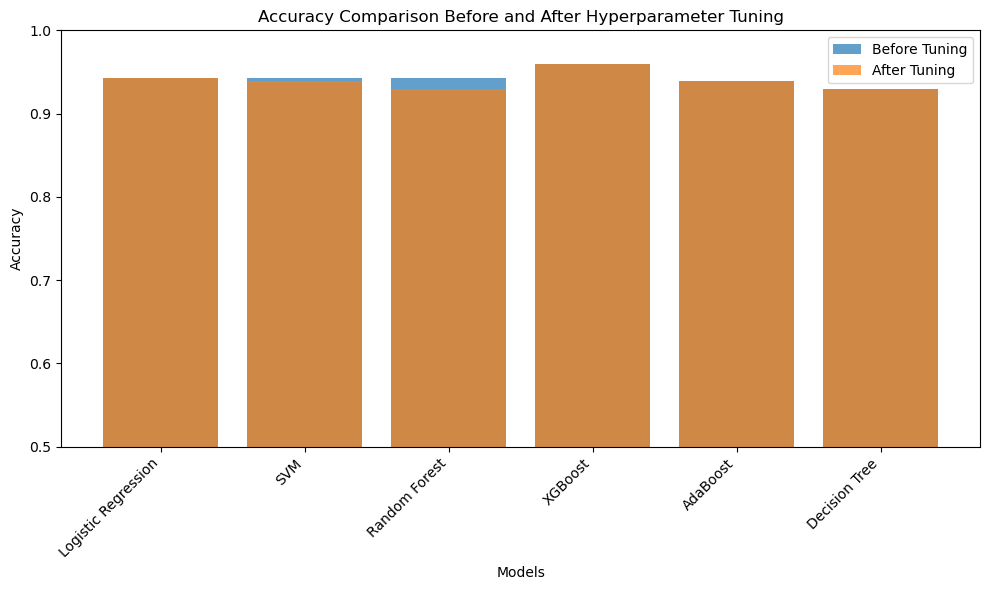

In [154]:
# Create a DataFrame to store metrics before and after hyperparameter tuning
metrics_data = {
    'Algorithm': algorithm_names,
    'Before_Tuning_Accuracy': accuracy_values,
    'After_Tuning_Accuracy': [],
}

# Before Hyperparameter Tuning
for model in [model1, model2, model3, model4, model2, model3]:
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[::, 1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    metrics_data['After_Tuning_Accuracy'].append(metrics.accuracy_score(y_test, y_pred))

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics_data)

# Calculate the rank based on AUC score
metrics_df['Rank'] = metrics_df['After_Tuning_Accuracy'].rank(ascending=False)

# Display the rank table
print(metrics_df.sort_values('Rank'))

# Create a bar plot to compare before and after tuning accuracy
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Algorithm'], metrics_df['Before_Tuning_Accuracy'], label='Before Tuning', alpha=0.7)
plt.bar(metrics_df['Algorithm'], metrics_df['After_Tuning_Accuracy'], label='After Tuning', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Before and After Hyperparameter Tuning')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [155]:
# Create a DataFrame to store metrics before and after hyperparameter tuning
metrics_data = {
    'Algorithm': algorithm_names,
    'Before_Tuning_Accuracy': accuracy_values,
    'After_Tuning_Accuracy': [],
    'AUC': []
}

# Before Hyperparameter Tuning
for model in [model1, model2, model3, model4, model2, model3]:
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[::, 1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    metrics_data['After_Tuning_Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    metrics_data['AUC'].append(auc)

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics_data)

# Calculate the rank based on AUC score
metrics_df['Rank_AUC'] = metrics_df['AUC'].rank(ascending=False)

# Sort the DataFrame by AUC rank
metrics_df = metrics_df.sort_values('Rank_AUC')

# Display the rank table
print(metrics_df[['Algorithm', 'AUC', 'Rank_AUC']])


             Algorithm       AUC  Rank_AUC
1                  SVM  0.975768       1.5
4             AdaBoost  0.975768       1.5
3              XGBoost  0.973651       3.0
0  Logistic Regression  0.973010       4.0
2        Random Forest  0.918538       5.5
5        Decision Tree  0.918538       5.5


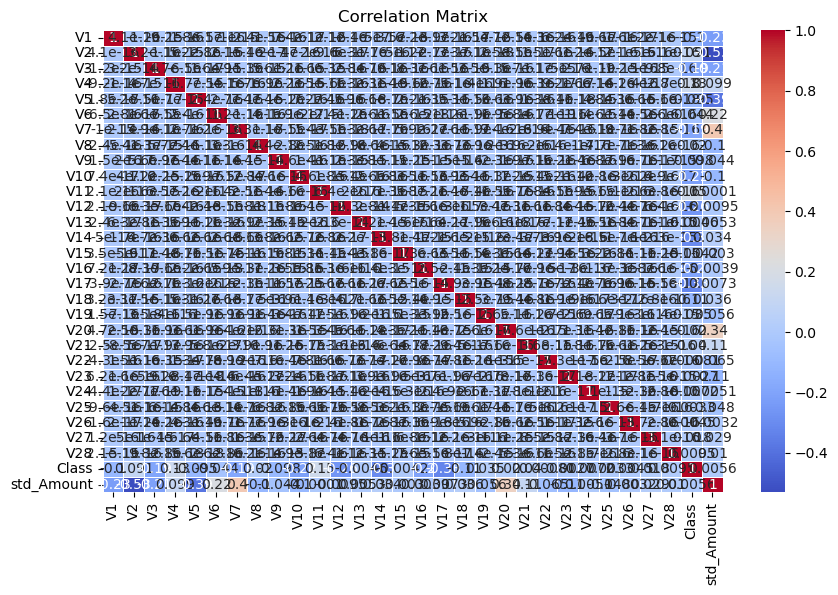

In [156]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

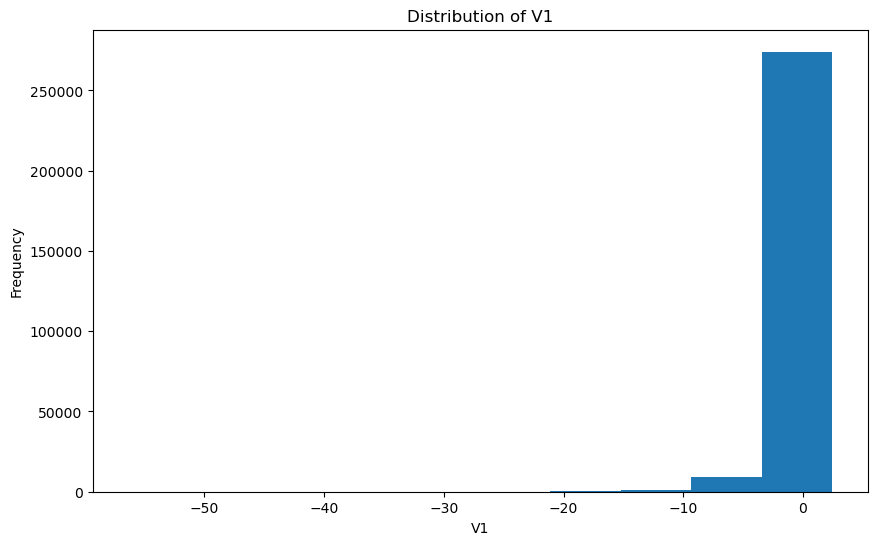

In [157]:
plt.figure(figsize=(10, 6))
plt.hist(df['V1'], bins=10)
plt.xlabel('V1')
plt.ylabel('Frequency')
plt.title('Distribution of V1')
plt.show()


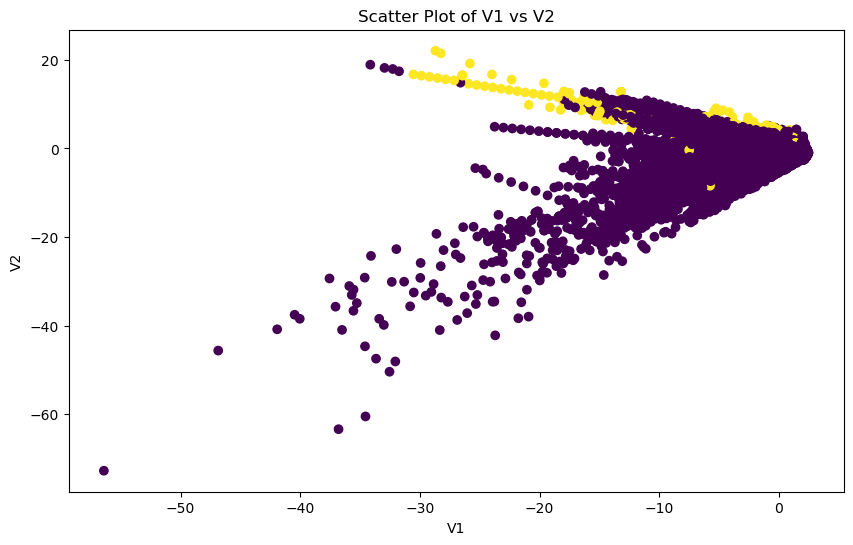

In [158]:
plt.figure(figsize=(10, 6))
plt.scatter(df['V1'], df['V2'], c=df['Class'], cmap='viridis')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Scatter Plot of V1 vs V2')
plt.show()


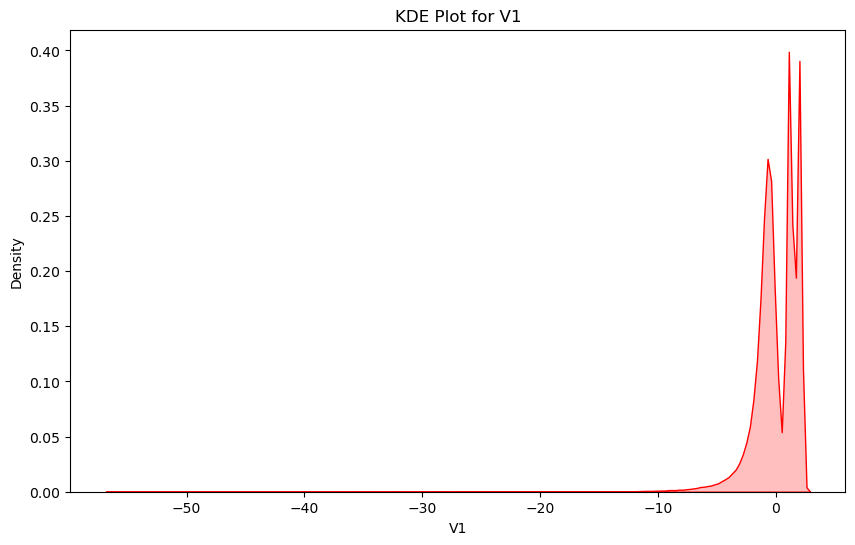

In [159]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['V1'], shade=True, color='r')
plt.title('KDE Plot for V1')
plt.show()

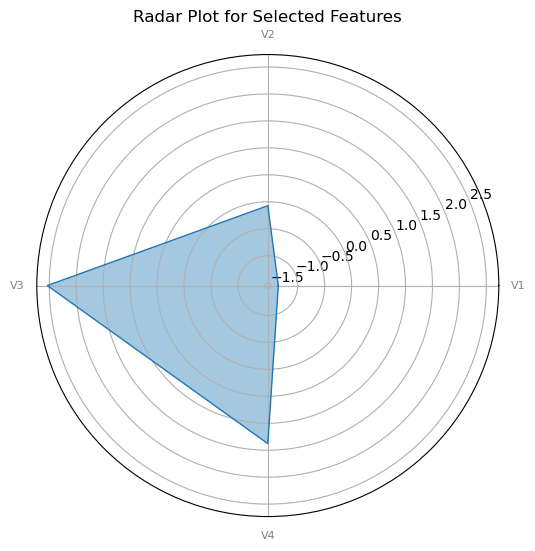

In [160]:
from math import pi
# Sample data, please adapt for your needs
categories = ['V1', 'V2', 'V3', 'V4']
values = df.loc[0, categories].values.tolist()
values += values[:1]
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, alpha=0.4)
plt.title('Radar Plot for Selected Features')
plt.show()

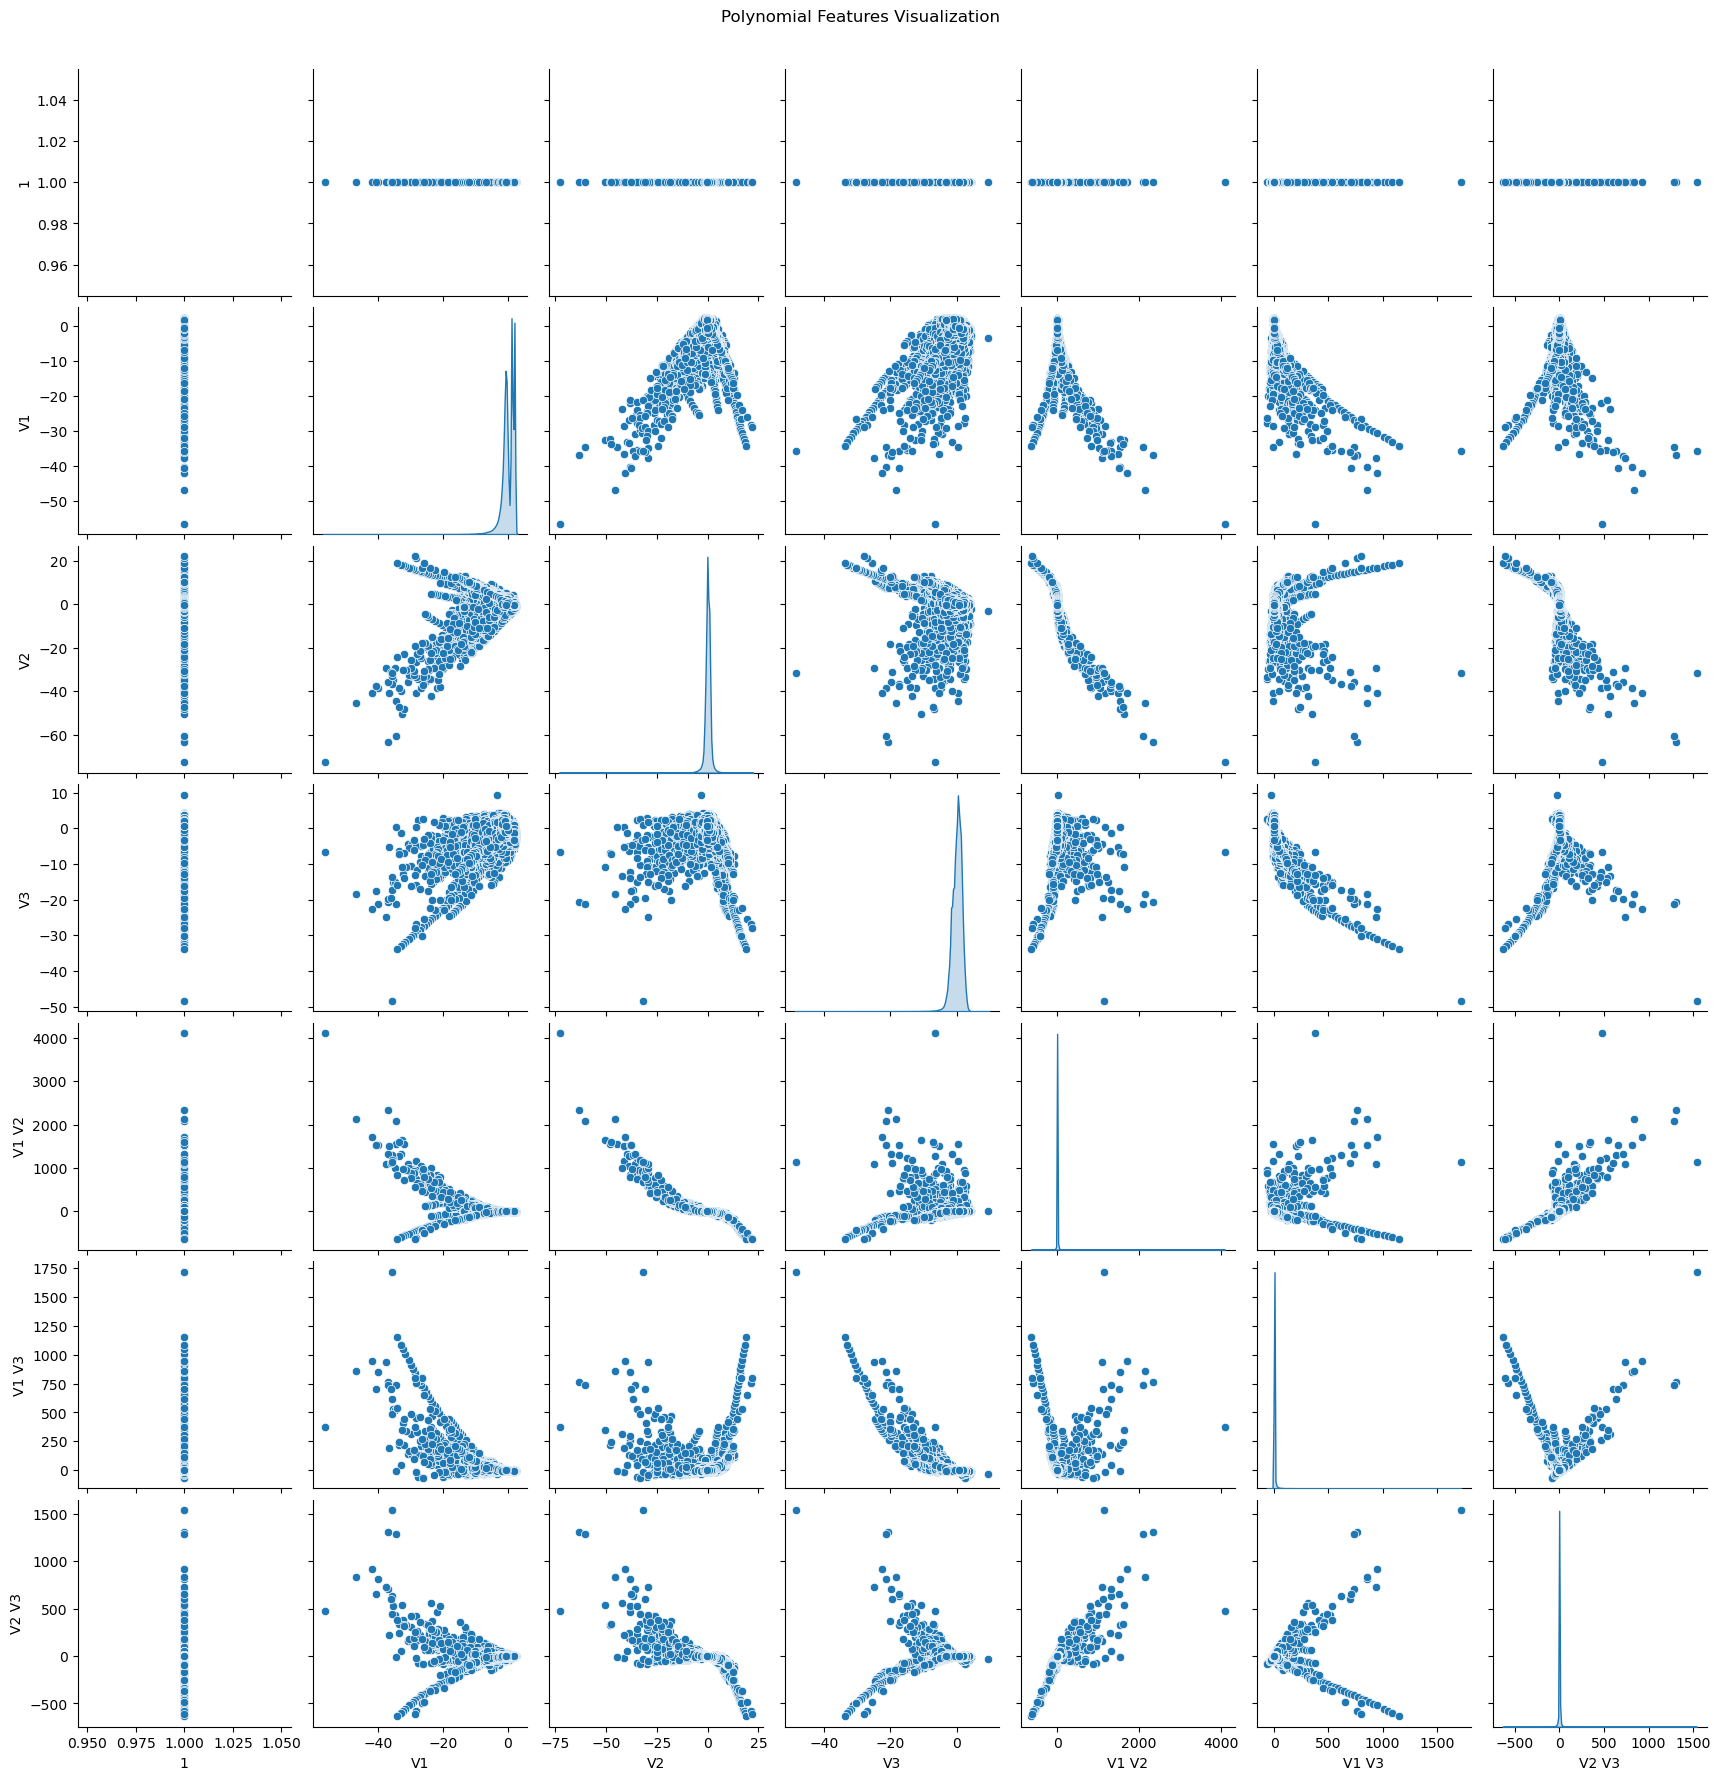

In [161]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)
polynomial_features = poly.fit_transform(df[['V1', 'V2', 'V3']])
poly_df = pd.DataFrame(polynomial_features, columns=poly.get_feature_names_out(['V1', 'V2', 'V3']))

# Visualization
sns.pairplot(poly_df, diag_kind='kde', height=2.5)
plt.suptitle('Polynomial Features Visualization', y=1.02)
plt.show()

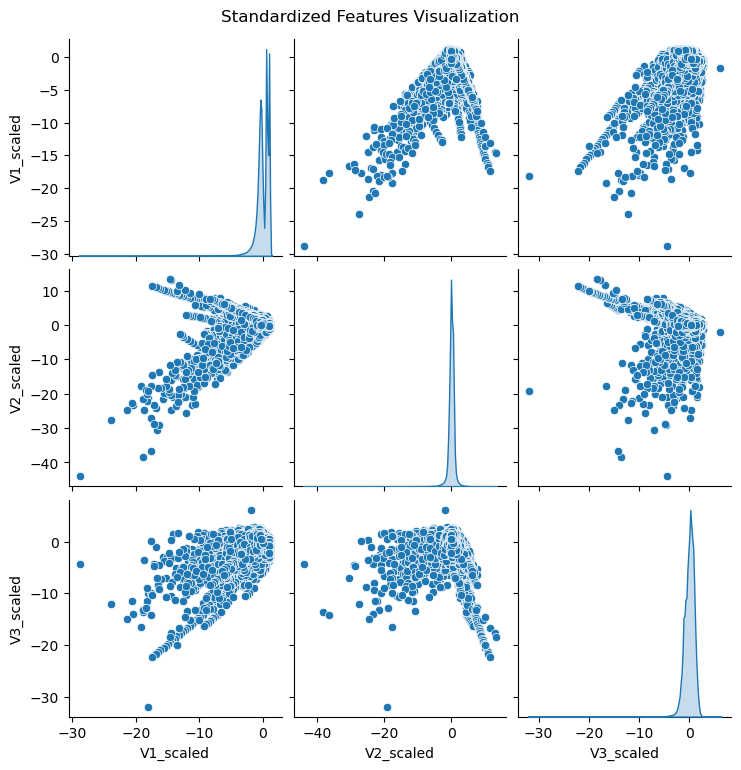

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['V1', 'V2', 'V3']])
scaled_df = pd.DataFrame(scaled_features, columns=['V1_scaled', 'V2_scaled', 'V3_scaled'])

# Visualization
sns.pairplot(scaled_df, diag_kind='kde', height=2.5)
plt.suptitle('Standardized Features Visualization', y=1.02)
plt.show()

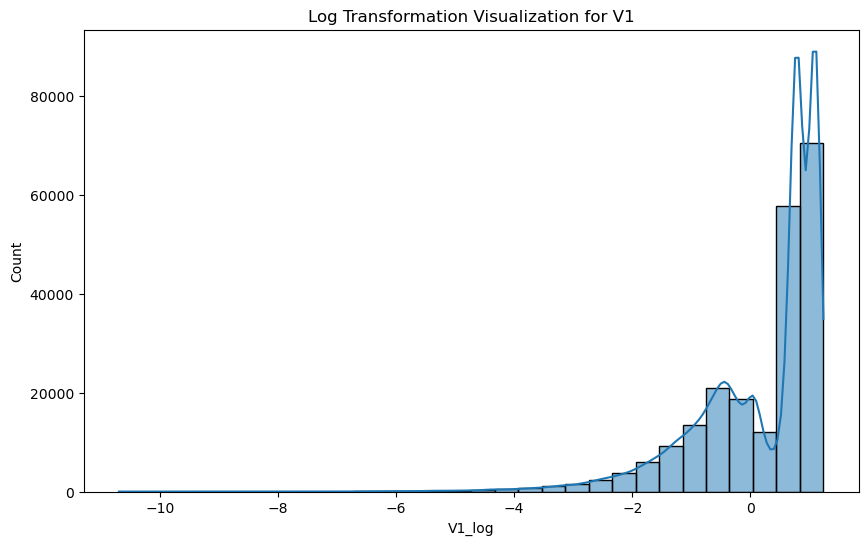

In [163]:
# Applying log transformation to V1
df['V1_log'] = np.log1p(df['V1'])

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['V1_log'], bins=30, kde=True)
plt.title('Log Transformation Visualization for V1')
plt.show()

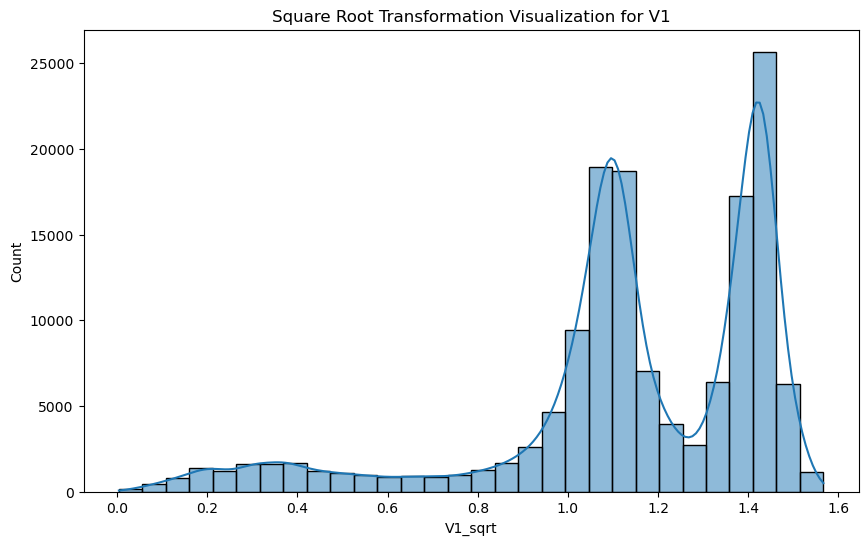

In [164]:
# Square root transformation on V1
df['V1_sqrt'] = np.sqrt(df['V1'])

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['V1_sqrt'], bins=30, kde=True)
plt.title('Square Root Transformation Visualization for V1')
plt.show()

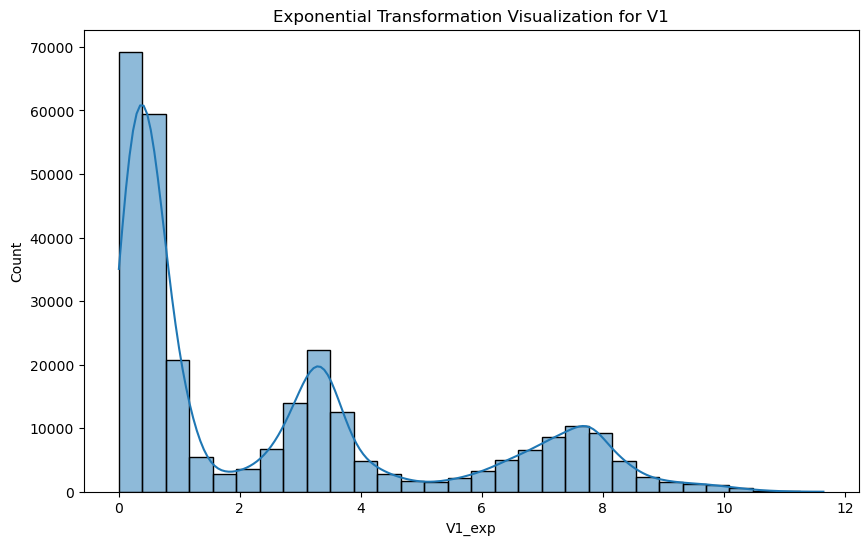

In [165]:
# Exponential transformation on V1
df['V1_exp'] = np.exp(df['V1'])

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['V1_exp'], bins=30, kde=True)
plt.title('Exponential Transformation Visualization for V1')
plt.show()

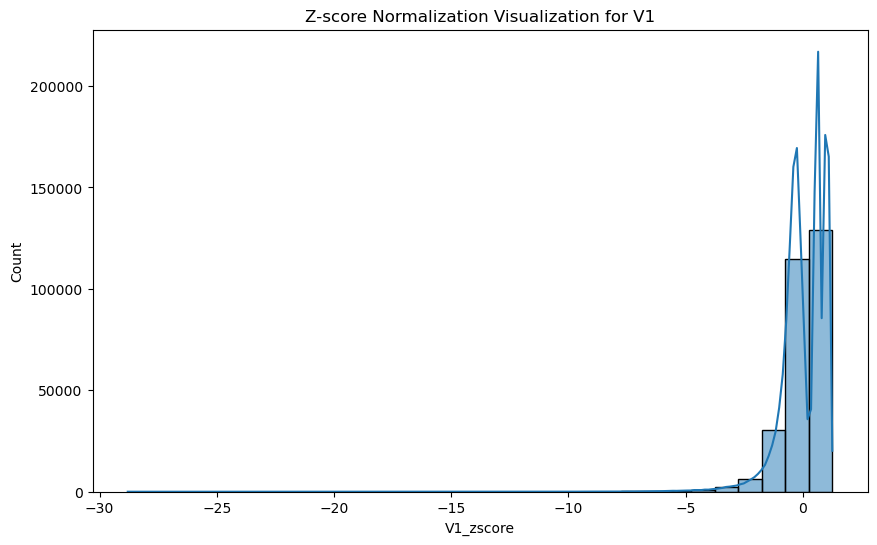

In [166]:
from scipy.stats import zscore

# Z-score normalization for V1
df['V1_zscore'] = zscore(df['V1'])

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['V1_zscore'], bins=30, kde=True)
plt.title('Z-score Normalization Visualization for V1')
plt.show()

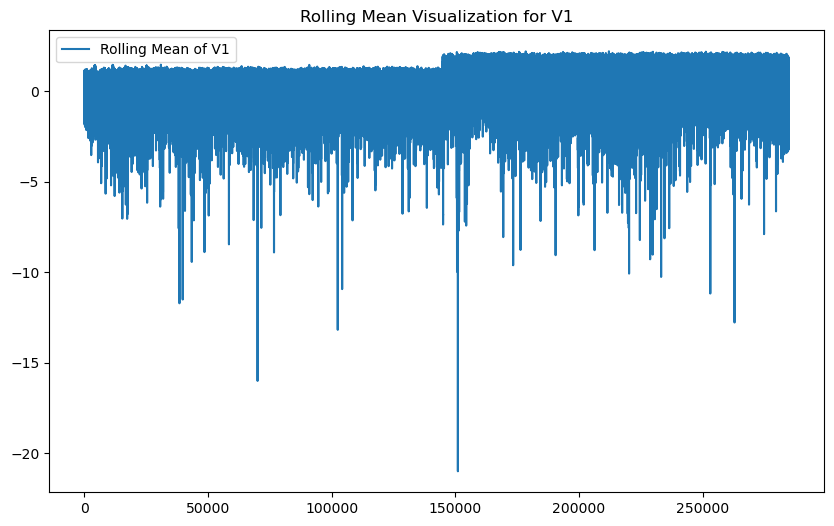

In [167]:
# Creating a rolling mean for V1 with a window size of 5
df['V1_rolling_mean'] = df['V1'].rolling(window=5).mean()

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(df['V1_rolling_mean'], label='Rolling Mean of V1')
plt.title('Rolling Mean Visualization for V1')
plt.legend()
plt.show()